<a href="https://colab.research.google.com/github/Obaidsajjad/CodeCue/blob/main/Task2_Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df=sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [19]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [6]:
df.drop("deck",axis=1,inplace=True)

<Axes: >

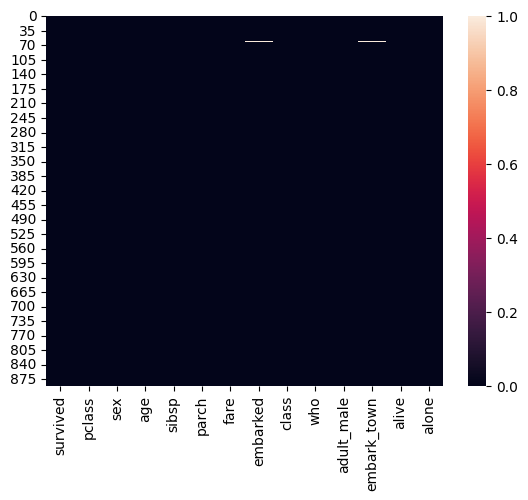

In [18]:
sns.heatmap(df.isnull())

In [14]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [16]:
df.groupby('pclass',axis=1).mean()

IndexError: index 13 is out of bounds for axis 0 with size 13

In [17]:
def impute_age(cols):
  age=cols[0]
  pclass=cols[1]

  if pd.isnull(age):
    if pclass==1:
      return 37
    elif pclass==2:
      return 29
    else:
      return 24
  else:
    return age

df["age"]=df[["age","pclass"]].apply(impute_age,axis=1)

In [21]:
df.drop(columns=["class","who","adult_male","embark_town","alone"],axis=1,inplace=True)
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alive
0,0,3,male,22.0,1,0,7.2500,S,no
1,1,1,female,38.0,1,0,71.2833,C,yes
2,1,3,female,26.0,0,0,7.9250,S,yes
3,1,1,female,35.0,1,0,53.1000,S,yes
4,0,3,male,35.0,0,0,8.0500,S,no
5,0,3,male,24.0,0,0,8.4583,Q,no
6,0,1,male,54.0,0,0,51.8625,S,no
7,0,3,male,2.0,3,1,21.0750,S,no
8,1,3,female,27.0,0,2,11.1333,S,yes
9,1,2,female,14.0,1,0,30.0708,C,yes


In [25]:
alives=pd.get_dummies(df["alive"],drop_first=True)
sexs=pd.get_dummies(df["sex"],drop_first=True)
embarkeds=pd.get_dummies(df["embarked"],drop_first=True)

In [26]:
df=pd.concat([df,alives,sexs,embarkeds],axis=1)
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alive,yes,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,no,False,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,yes,True,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,yes,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,yes,True,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,no,False,True,False,True
5,0,3,male,24.0,0,0,8.4583,Q,no,False,True,True,False
6,0,1,male,54.0,0,0,51.8625,S,no,False,True,False,True
7,0,3,male,2.0,3,1,21.0750,S,no,False,True,False,True
8,1,3,female,27.0,0,2,11.1333,S,yes,True,False,False,True
9,1,2,female,14.0,1,0,30.0708,C,yes,True,False,False,False


In [27]:
df.drop(columns=["alive","sex","embarked"],axis=1,inplace=True)
df.head(10)

,survived,pclass,age,sibsp,parch,fare,yes,male,Q,S
0,0,3,22.0,1,0,7.2500,False,True,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,True
5,0,3,24.0,0,0,8.4583,False,True,True,False
6,0,1,54.0,0,0,51.8625,False,True,False,True
7,0,3,2.0,3,1,21.0750,False,True,False,True
8,1,3,27.0,0,2,11.1333,True,False,False,True
9,1,2,14.0,1,0,30.0708,True,False,False,False


<Axes: xlabel='age', ylabel='Count'>

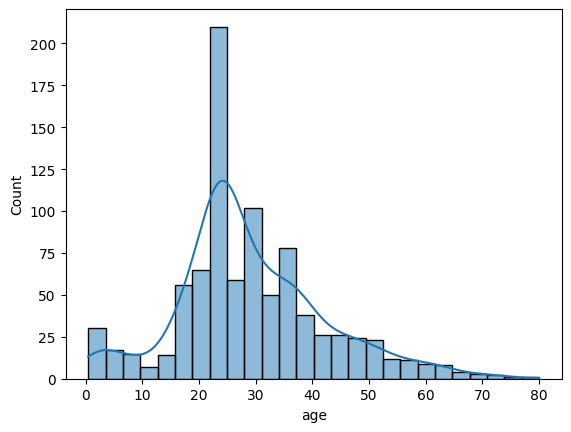

In [30]:
sns.histplot(df["age"],kde=True)

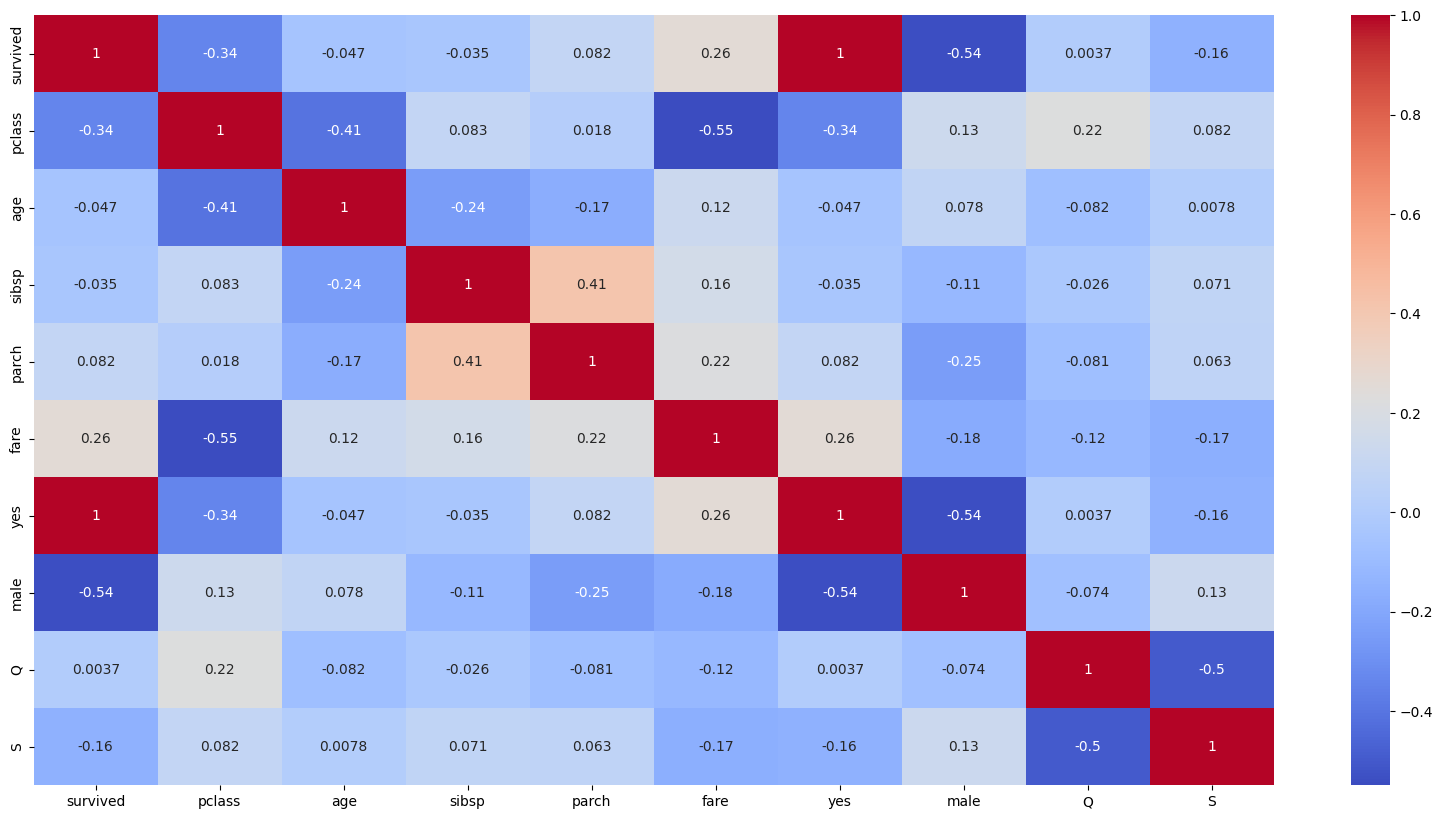

In [33]:
plt.figure(figsize=(20,10))
# sns.boxplot(x="pclass",y="age",data=df)
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

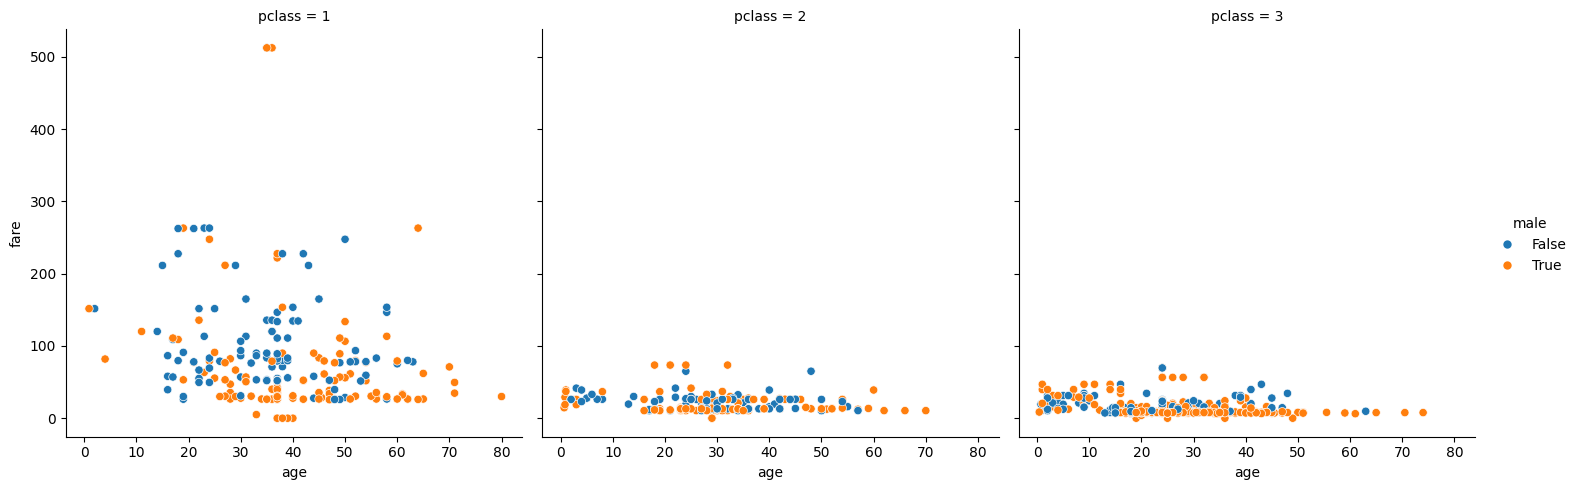

In [35]:
sns.relplot(x="age",y="fare",col="pclass",hue="male",data=df)

<Axes: xlabel='male', ylabel='survived'>

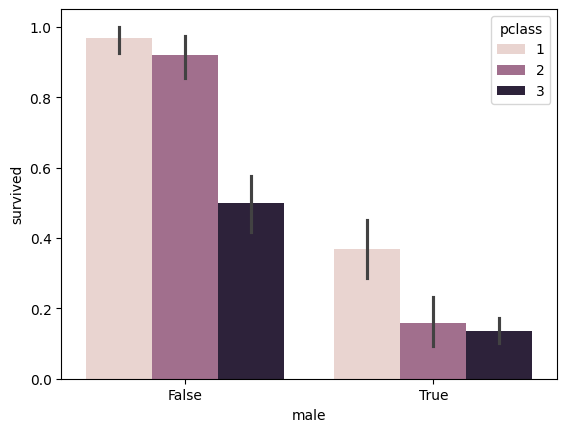

In [37]:
sns.barplot(x="male",y="survived",hue="pclass",data=df)

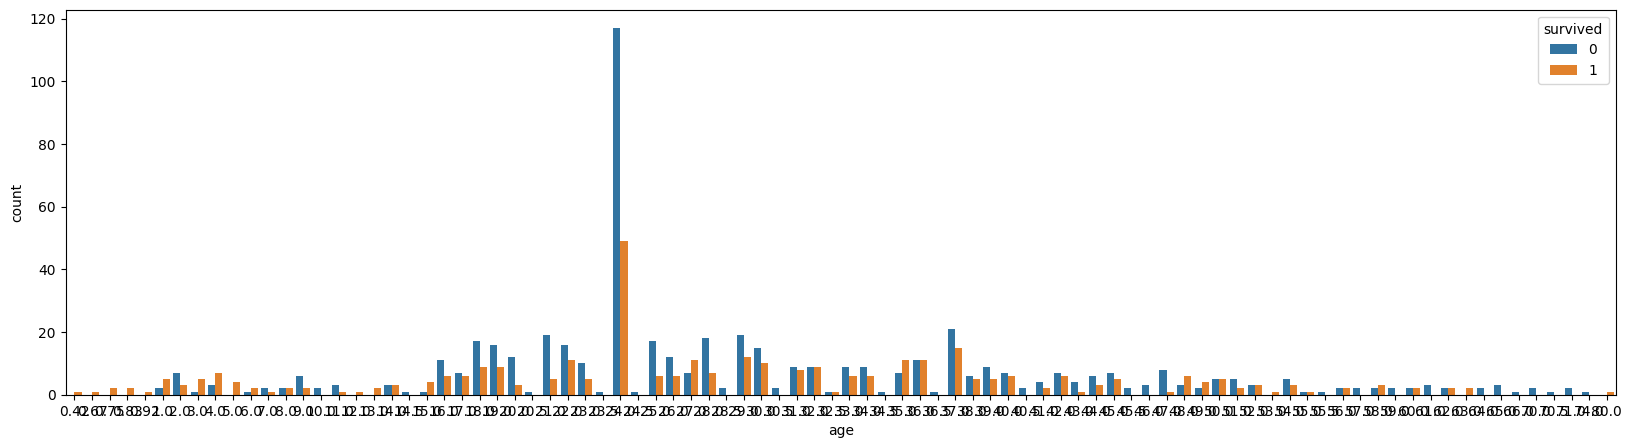

In [39]:
plt.figure(figsize=(20,5))
sns.countplot(x="age",hue="survived",data=df)
plt.show()

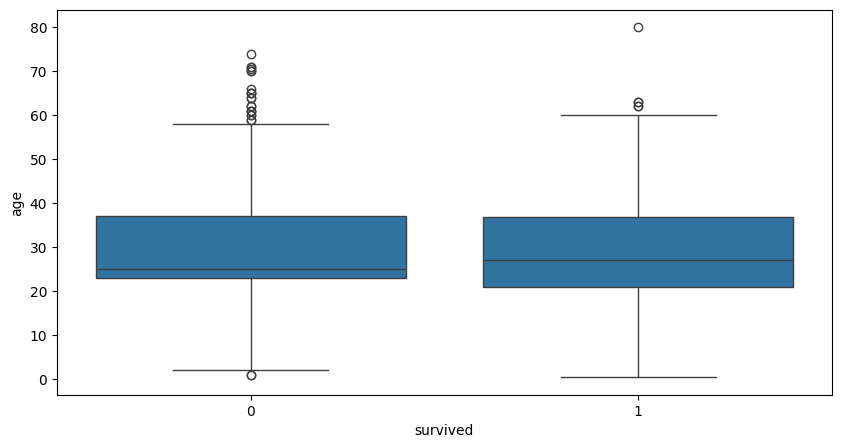

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x="survived",y="age",data=df)
plt.show()

<Axes: xlabel='survived', ylabel='age'>

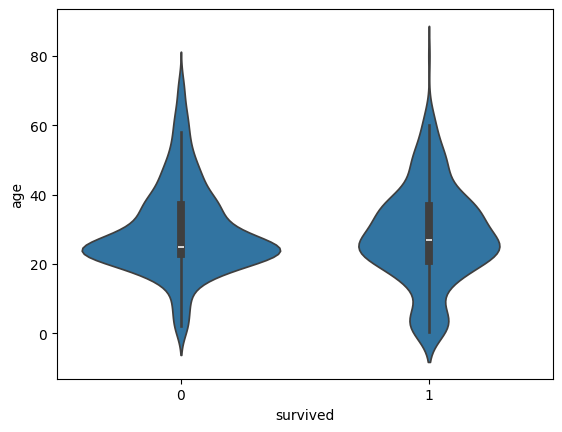

In [44]:
sns.violinplot(x="survived",y="age",data=df)

In [45]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.066409,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.244532,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
